## Predicting  Diabetes

In [3]:
import pandas as pd #data frame liberary 
import matplotlib.pyplot as plt   #for ploting the data
import numpy  as np    #numpy provides  N-dim object support 
                        #data manipulation and analysis

#do ploting inline instead of  a seperate window

%matplotlib inline

### Load and review data

In [18]:
df=pd.read_csv('pima-data.csv', delimiter=',')  #load Pima data. Adjust path as necesary
df.shape

(768, 10)

In [11]:
df.head()   #to show the beginning row of our data set

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [12]:
df.isnull().values.any()

False

In [13]:
import matplotlib.pyplot as plt # matpllotlib.pyplot plots data
def plot_corr(df , size=11):
    
    #Blue-cyan-yellow-red-darked=>less to more correlated 
    #correlation between every  pair of column 
    corr=df.corr() #data frame correlation function
    fig ,ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)  #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns)  #draw x tick marks
    plt.yticks(range(len(corr.columns)),corr.columns)  #draw y tick marks
    

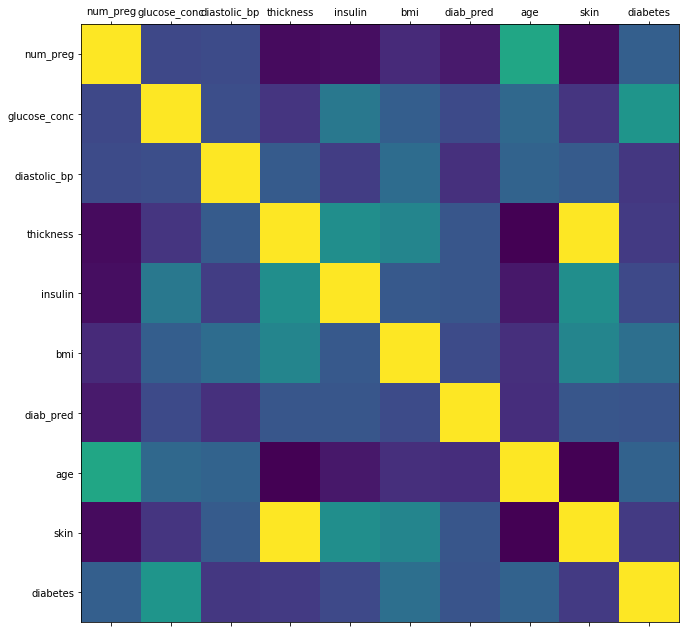

In [28]:
plot_corr(df)

In [14]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [15]:
del df ['skin']

In [1]:
#plot_corr(df)

#### Check Data Types

In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [33]:
diabetes_map={True:1,False:0}

In [34]:
df['diabetes']=df['diabetes'].map(diabetes_map)

In [35]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check  True and false ratio

In [36]:
num_true=len(df.loc[df['diabetes']==True])
num_false=len(df.loc[df['diabetes']==False])

print(" Number of true cases is: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false)) *100))
print(" Number of false cases is: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_false + num_true))*100))

 Number of true cases is: 268 (34.90%)
 Number of false cases is: 500 (65.10%)


In [52]:
from sklearn.cross_validation import train_test_split

feature_col_names=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicated_class_names=['diabetes']

X=df[feature_col_names] #predicator feature columns (8 X m)
Y=df[predicated_class_names]#predicated class (1=truw, 0= false) column (1 X m)
split_test_size=0.30

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=split_test_size,random_state=42)
                #test_size=0.3 is 30% , 42 is the answer to every thing

In [53]:
print("{0:0.2f}% in trainning set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in trainning set
30.08% in test set
